In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 15118 files belonging to 13 classes.


In [7]:
class_names = dataset.class_names
class_names

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Rice_bacterial_leaf_blight',
 'Rice_brown_spot',
 'Rice_healthy',
 'Rice_leaf_blast',
 'Rice_leaf_scald',
 'Rice_narrow_brown_spot']

In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 256, 256, 3)
[ 3  6  4  0 10  5  3  7  9  7  5  4  4  5  5  0  4  0  6  4  2  4 10  1
  1  4  4  3  5  5  1  5]


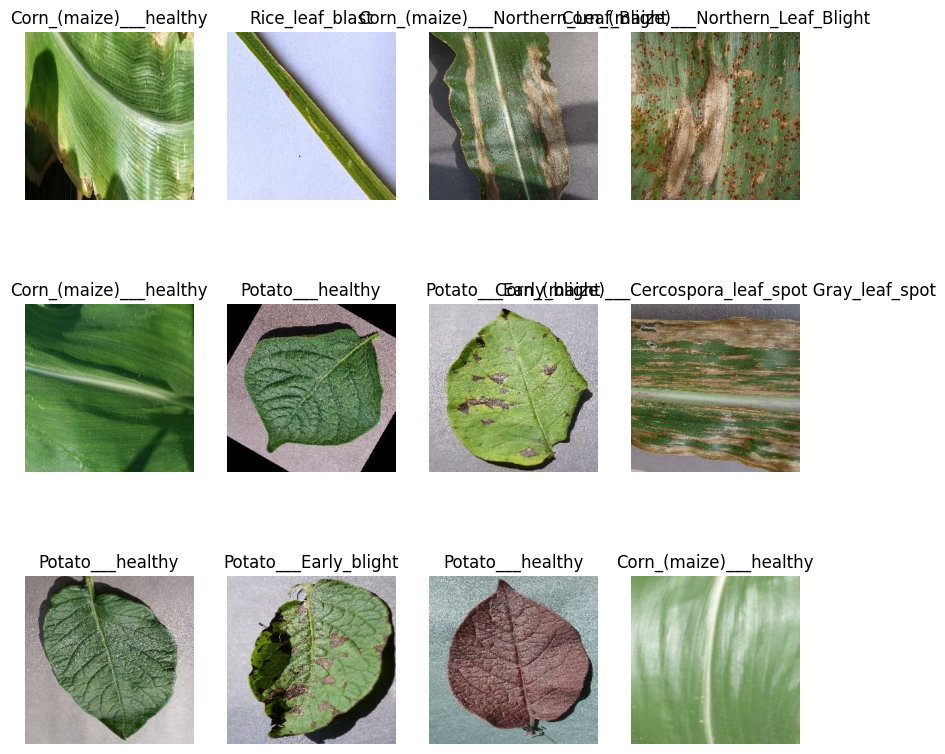

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
#Train, test and validation split function

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=False, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(train_ds)

378

In [13]:
len(test_ds)

48

In [14]:
len(val_ds)

47

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
input_shape = (32, 256, 256, 3)
n_classes = 13

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
378/378 [==============================] - 1977s 5s/step - loss: 1.3141 - accuracy: 0.4937 - val_loss: 0.7854 - val_accuracy: 0.7074
Epoch 2/10
378/378 [==============================] - 1868s 5s/step - loss: 0.5411 - accuracy: 0.7964 - val_loss: 0.4423 - val_accuracy: 0.8331
Epoch 3/10
378/378 [==============================] - 1875s 5s/step - loss: 0.3158 - accuracy: 0.8862 - val_loss: 0.2797 - val_accuracy: 0.9056
Epoch 4/10
378/378 [==============================] - 1895s 5s/step - loss: 0.2643 - accuracy: 0.9046 - val_loss: 0.2580 - val_accuracy: 0.9116
Epoch 5/10
378/378 [==============================] - 1886s 5s/step - loss: 0.1976 - accuracy: 0.9277 - val_loss: 0.2029 - val_accuracy: 0.9262
Epoch 6/10
378/378 [==============================] - 1889s 5s/step - loss: 0.1607 - accuracy: 0.9433 - val_loss: 0.1570 - val_accuracy: 0.9382
Epoch 7/10
378/378 [==============================] - 1882s 5s/step - loss: 0.1603 - accuracy: 0.9430 - val_loss: 0.1708 - val_accuracy:

In [18]:
model.save('./model/2')


INFO:tensorflow:Assets written to: ./model/2\assets


INFO:tensorflow:Assets written to: ./model/2\assets
